In [27]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_vHo8B6nPvRg.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@ConnerAnimationsOfficial,Flash is too fast my ass,2024-11-04T19:36:43Z,0,0
1,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@Vman_95,Rocksteady made amazing openworld with Batman ...,2024-10-31T19:33:16Z,0,0
2,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@DeeNSRT,I’m not sure about Xbox but it’s on sale for 1...,2024-10-19T00:11:46Z,0,0
3,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@tonybeals1011,Sooo they took the Arkham brand and made it bo...,2024-10-17T19:26:48Z,0,0
4,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@teehee8522,why modern audience do not play this game?,2024-10-17T04:19:39Z,0,1
...,...,...,...,...,...,...,...,...
1215,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@justedits95,5/10 👍🏻,2024-02-02T22:18:43Z,0,5
1216,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@nofox777,Great so they made the exact mistakes,2024-02-02T22:18:30Z,0,1
1217,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@EzeeyIsOG,17 min review guess ign were angry about not g...,2024-02-02T22:18:27Z,10,98
1218,https://www.youtube.com/watch?v=vHo8B6nPvRg,Suicide Squad: Kill the Justice League Review,2024-02-02T22:17:21Z,@papajohns1486,5/10 y’all,2024-02-02T22:18:17Z,54,2618


In [29]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ig n', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','batman',
    'review','suicide','game','squad','justice', 'league','kill','arkham','gotham',
    'knight','avenger','looter','rocksteady','kevin',"minute", "fun", "look", "one", 
    "would", "gon", "give", "still", "best", "money", "huh", "enjoying", "story", 
     "great", "franchise"
])
lmtzr = WordNetLemmatizer()

In [30]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [31]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
117,2024-02-09,Suicide Squad: Kills the Arkham-verse,suicide squad kill arkhamverse
118,2024-02-09,I've seen enough,ive seen enough
119,2024-02-09,This game is a 7 in my opinion,game opinion
120,2024-02-09,This game better then marvels avengers 😂,game better marvel avenger
121,2024-02-09,DC / Warner / Have had bad run with these IP”s...,warner bad run gotham knight suicide squad• re...
...,...,...,...
1215,2024-02-02,5/10 👍🏻,510
1216,2024-02-02,Great so they made the exact mistakes,great exact mistake
1217,2024-02-02,17 min review guess ign were angry about not g...,min guess ign angry getting early access
1218,2024-02-02,5/10 y’all,510


In [32]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

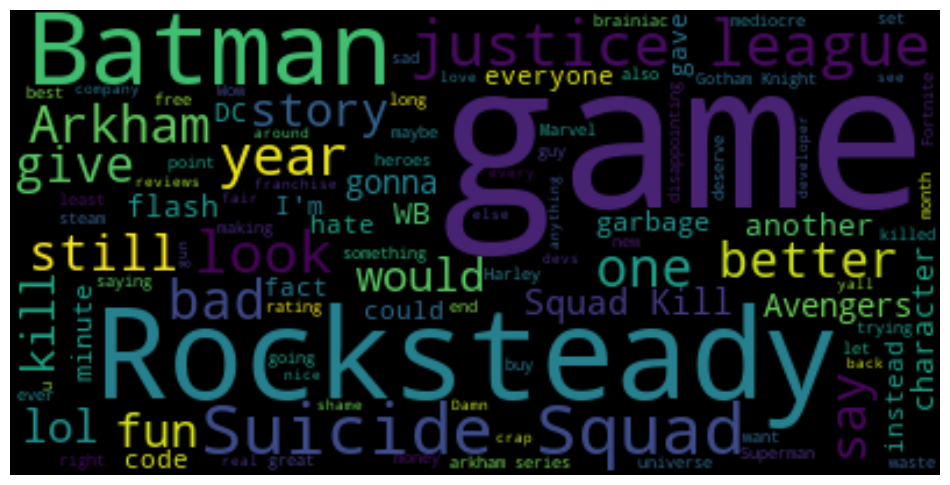

In [33]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2024-02-03,skill Problem... same old IGN.,skill problem old ign,negative
1,2024-02-03,The game looks more like overwatch more than a...,game look overwatch anything else,neutral
2,2024-02-03,why the hell this looks like a 2012 game.,hell look 2012 game,negative
3,2024-02-03,"For me once, I’m with IGN",ign,neutral
4,2024-02-03,Hoping this game dies right after the Joker DL...,hoping game dy right joker dlc tbh ready hear ...,positive
...,...,...,...,...
495,2024-02-03,People should checkout the game for themselves...,checkout game follow,neutral
496,2024-02-03,Such a disappointing waste of potential…,disappointing waste potential…,negative
497,2024-02-03,They just wanted to make this game before The ...,wanted game boy,neutral
498,2024-02-04,IGN redemption arc.\n2024 is wild.,ign redemption arc 2024 wild,neutral


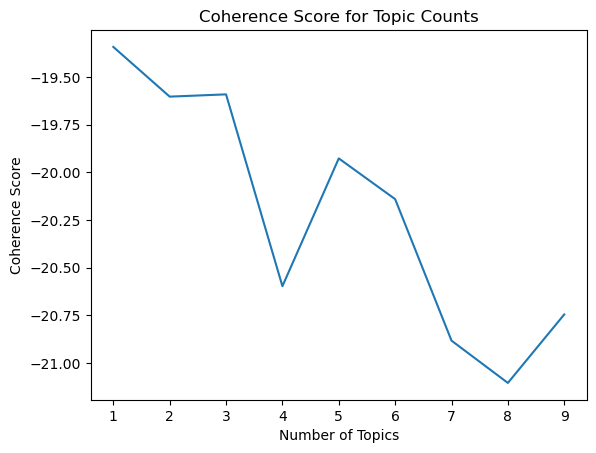

In [35]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [36]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 3
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.006*"better" + 0.006*"year" + 0.006*"disappointing" + 0.006*"sad" + 0.006*"hate" + 0.004*"damn" + 0.004*"fire" + 0.004*"everyone" + 0.003*"generous" + 0.003*"deserved"'), (1, '0.008*"garbage" + 0.007*"code" + 0.006*"say" + 0.005*"buy" + 0.004*"flop" + 0.004*"salty" + 0.004*"wow" + 0.003*"done" + 0.003*"fact" + 0.003*"getting"'), (2, '0.009*"bad" + 0.007*"gave" + 0.007*"series" + 0.005*"long" + 0.004*"rating" + 0.004*"mediocre" + 0.004*"horrible" + 0.004*"marvel" + 0.004*"min" + 0.004*"fortnite"')]


The coherence score start dropping significantly when the number of topics is more than 3.
This result also aligns with the bigrams

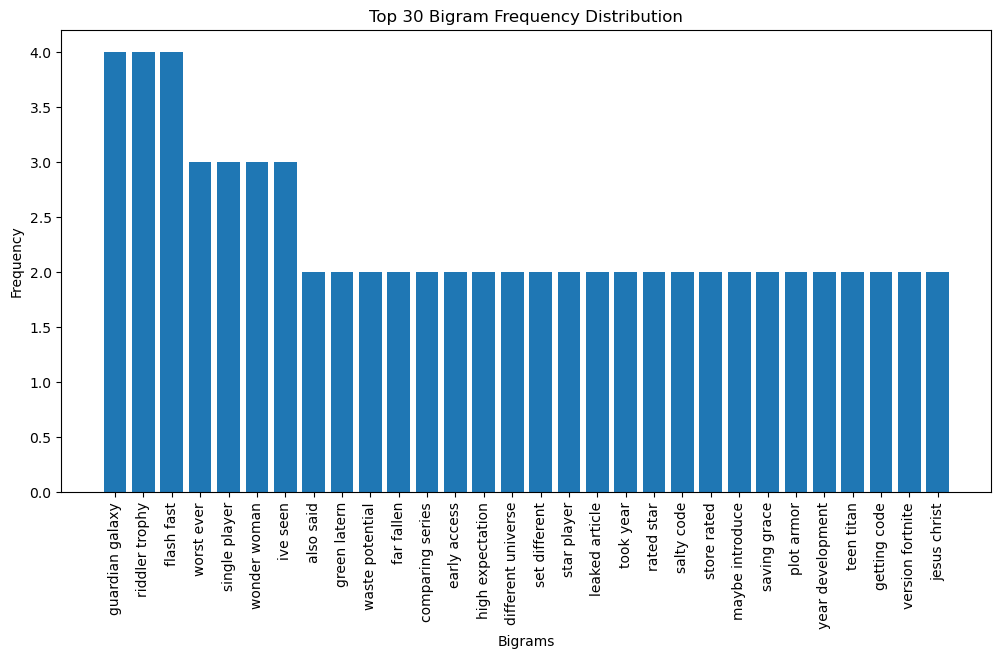

In [38]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [39]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_bad_topics.to_csv(file_path, index=False)
df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
5,Suicide Squad: Kill the Justice League Review,3
